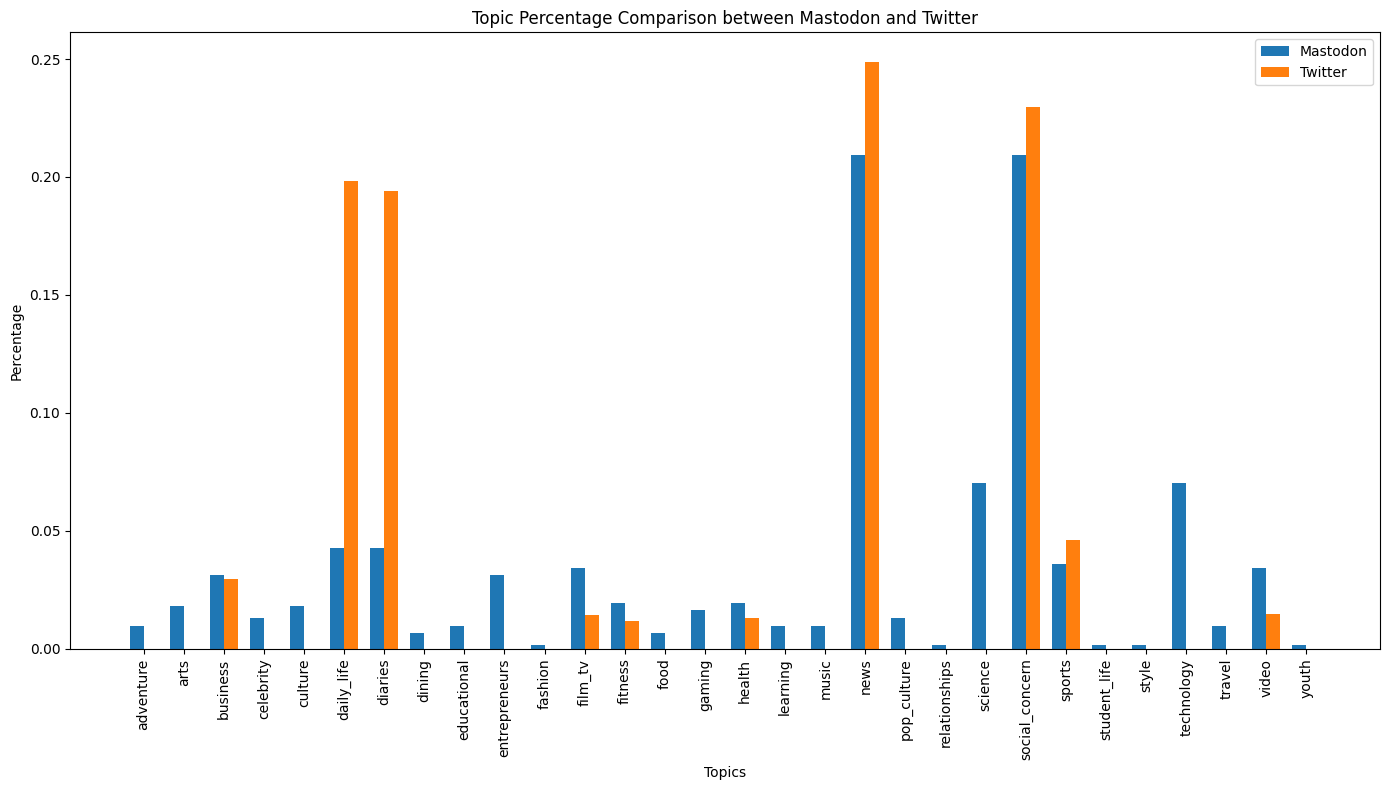

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
solditems = requests.get('http://127.0.0.1:9090/mastodon/gt')
mastodon_gt = solditems.json()
solditems = requests.get('http://127.0.0.1:9090/mastodon/lt')
mastodon_lt = solditems.json()
solditems = requests.get('http://127.0.0.1:9090/twitter/gt')
twitter_gt = solditems.json()
solditems = requests.get('http://127.0.0.1:9090/twitter/lt')
twitter_lt = solditems.json()

# Combine counts for Mastodon and Twitter respectively
def combine_counts(data1, data2):
    combined = {}
    for key in set(data1) | set(data2):
        combined[key] = data1.get(key, 0) + data2.get(key, 0)
    return combined

mastodon_combined = combine_counts(mastodon_gt, mastodon_lt)
twitter_combined = combine_counts(twitter_gt, twitter_lt)

# Calculate total counts
mastodon_total = sum(mastodon_combined.values())
twitter_total = sum(twitter_combined.values())

# Calculate percentages
mastodon_percentages = {k: (v / mastodon_total)for k, v in mastodon_combined.items()}
twitter_percentages = {k: (v / twitter_total)  for k, v in twitter_combined.items()}

# Prepare data for plotting
topics = sorted(set(mastodon_combined) | set(twitter_combined))
mastodon_data = [mastodon_percentages.get(topic, 0) for topic in topics]
twitter_data = [twitter_percentages.get(topic, 0) for topic in topics]

x = np.arange(len(topics))
width = 0.35

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x - width/2, mastodon_data, width, label='Mastodon')
bars2 = ax.bar(x + width/2, twitter_data, width, label='Twitter')

ax.set_xlabel('Topics')
ax.set_ylabel('Percentage')
ax.set_title('Topic Percentage Comparison between Mastodon and Twitter')
ax.set_xticks(x)
ax.set_xticklabels(topics, rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig('topic_percentage_comparison.png') 
plt.show()


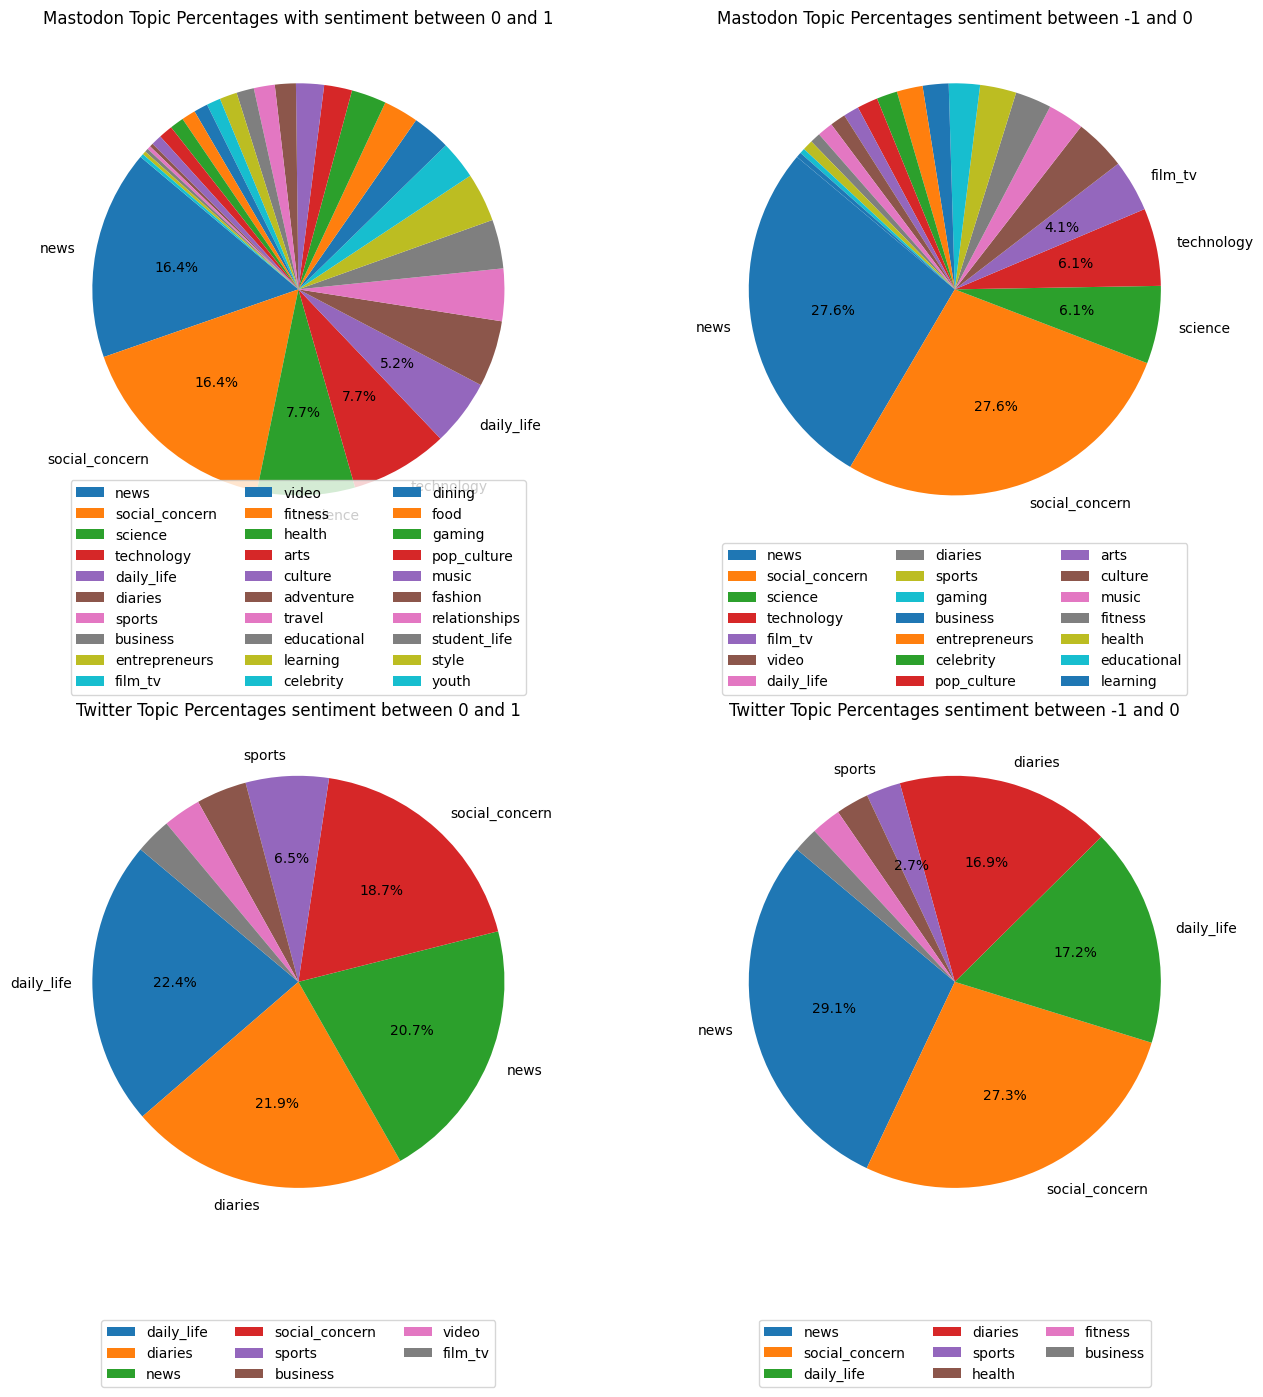

In [2]:
import json
import matplotlib.pyplot as plt


solditems = requests.get('http://127.0.0.1:9090/mastodon/gt')
mastodon_gt = solditems.json()
solditems = requests.get('http://127.0.0.1:9090/mastodon/lt')
mastodon_lt = solditems.json()
solditems = requests.get('http://127.0.0.1:9090/twitter/gt')
twitter_gt = solditems.json()
solditems = requests.get('http://127.0.0.1:9090/twitter/lt')
twitter_lt = solditems.json()

# Function to calculate percentages
def calculate_percentages(data):
    total = sum(data.values())
    percentages = {k: (v / total) * 100 for k, v in data.items()}
    return percentages

# Function to get top five topics
def get_top_five(percentages):
    sorted_percentages = sorted(percentages.items(), key=lambda item: item[1], reverse=True)
    top_five = sorted_percentages[:5]
    top_five_labels = [item[0] for item in top_five]
    top_five_values = [item[1] for item in top_five]
    return top_five_labels, top_five_values, sorted_percentages

# Calculate percentages for each JSON data
mastodon_gt_percentages = calculate_percentages(mastodon_gt)
mastodon_lt_percentages = calculate_percentages(mastodon_lt)
twitter_gt_percentages = calculate_percentages(twitter_gt)
twitter_lt_percentages = calculate_percentages(twitter_lt)

# Get top five topics for each JSON data
mastodon_gt_labels, mastodon_gt_values, mastodon_gt_all = get_top_five(mastodon_gt_percentages)
mastodon_lt_labels, mastodon_lt_values, mastodon_lt_all = get_top_five(mastodon_lt_percentages)
twitter_gt_labels, twitter_gt_values, twitter_gt_all = get_top_five(twitter_gt_percentages)
twitter_lt_labels, twitter_lt_values, twitter_lt_all = get_top_five(twitter_lt_percentages)

# Plotting the pie charts
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Function to plot pie chart
def plot_pie(ax, values, labels, all_data):
    top_labels = set(labels)
    all_labels = [item[0] for item in all_data]
    sizes = [item[1] for item in all_data]
    pie_labels = [label if label in top_labels else '' for label in all_labels]
    wedges, texts, autotexts = ax.pie(sizes, labels=pie_labels, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=140)
    for i, text in enumerate(autotexts):
        if pie_labels[i] == '':
            text.set_text('')
    return wedges

# Mastodon GT Pie Chart
wedges = plot_pie(axs[0, 0], mastodon_gt_values, mastodon_gt_labels, mastodon_gt_all)
axs[0, 0].set_title('Mastodon Topic Percentages with sentiment between 0 and 1')
axs[0, 0].legend(wedges, [item[0] for item in mastodon_gt_all], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

# Mastodon LT Pie Chart
wedges = plot_pie(axs[0, 1], mastodon_lt_values, mastodon_lt_labels, mastodon_lt_all)
axs[0, 1].set_title('Mastodon Topic Percentages sentiment between -1 and 0')
axs[0, 1].legend(wedges, [item[0] for item in mastodon_lt_all], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

# Twitter GT Pie Chart
wedges = plot_pie(axs[1, 0], twitter_gt_values, twitter_gt_labels, twitter_gt_all)
axs[1, 0].set_title('Twitter Topic Percentages sentiment between 0 and 1')
axs[1, 0].legend(wedges, [item[0] for item in twitter_gt_all], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

# Twitter LT Pie Chart
wedges = plot_pie(axs[1, 1], twitter_lt_values, twitter_lt_labels, twitter_lt_all)
axs[1, 1].set_title('Twitter Topic Percentages sentiment between -1 and 0')
axs[1, 1].legend(wedges, [item[0] for item in twitter_lt_all], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.tight_layout()
plt.savefig('topic_percentage_for_different_sentiment.png') 
plt.show()

      

